# Housekeeping

# Setup Code

In [116]:
using Pkg; Pkg.add("LaTeXStrings")
using Plots,DelimitedFiles,LsqFit,LaTeXStrings

include("src/PhotoPeakFit.jl");

default(framestyle=:box,
        mc=:black,
        grid=false,
        guidefont=14,
        tickfont=12,
        lc=:navy,
        xlabel="Eᵧ (internal)",
        ylabel="counts")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
    Updating `~/Library/Mobile Documents/com~apple~CloudDocs/Coding Projects/VITO-ENiGMA/Project.toml`
  [b964fa9f] + LaTeXStrings v1.4.0
  No Changes to `~/Library/Mobile Documents/com~apple~CloudDocs/Coding Projects/VITO-ENiGMA/Manifest.toml`
Precompiling project...
   1195.2 ms  ✓ IteratorInterfaceExtensions
   1204.7 ms  ✓ DataValueInterfaces
   1203.1 ms  ✓ IniFile
   1198.3 ms  ✓ Pidfile
   1640.3 ms  ✓ Observables
   1369.9 ms  ✓ URIs
   1536.5 ms  ✓ URIParser
    476.8 ms  ✓ FunctionalCollections
   1699.6 ms  ✓ MbedTLS
    539.4 ms  ✓ Hiccup
    679.4 ms  ✓ TableTraits
    994.6 ms  ✓ AssetRegistry
   2296.3 ms  ✓ Lazy
   1046.4 ms  ✓ Widgets
   1141.4 ms  ✓ Tables
   1600.0 ms  ✓ BinDeps
    556.0 ms  ✓ Mustache
   2116.3 ms  ✓ HTTP
    762.7 ms  ✓ WebSockets
   1608.4 ms  ✓ Mux
   2205.4 ms  ✓ WebIO
   1260.0 ms  ✓ JSExpr
   2457.2 ms  ✓ Blink
   2983.9 ms  ✓ PlotlyJS
   2558.0 ms  ✓

In [117]:
kliterature = [564.79,
               586.01,
               2013.45]

3-element Vector{Float64}:
  564.79
  586.01
 2013.45

## Import Eu152 Efficiency Calibration Data

In [118]:
# Fit function is of the form 50^(p[1]+p[2]*log10(e)+p[3]*log10(e)^2)
io = open("calibrations/Eu152-efficiency-cal.csv", "r")
clover_eff_params = readdlm(io, ',', Float64, '\n', comments=true, comment_char='#')
close(io)

c0_eff_params, c1_eff_params, c2_eff_params = clover_eff_params[1,:],clover_eff_params[2,:],clover_eff_params[3,:]

([-1.3982597337116331, 0.35391031345532786, -0.21261326033192948], [-2.807639631381245, 0.7381822390049413, -0.27830654335009786], [-0.5125214009869775, -0.2891849631131059, -0.0842111361765569])

# Clover 0

## Crystal 1 (c0c1)

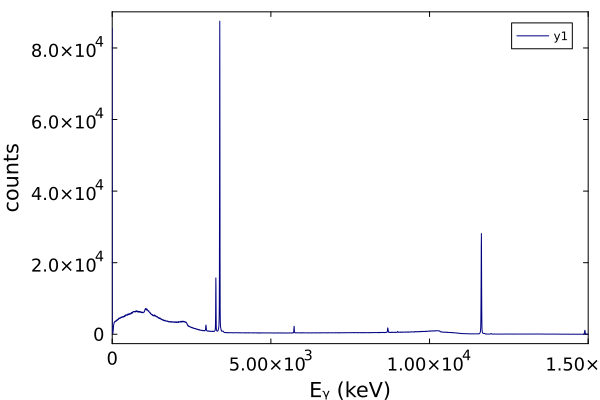

In [119]:
kc0c1 = readdlm("data/K47_T1_001_rawClover_crystal_01.txt",',')

# Plot uncalibrated histogram
plot(kc0c1[:,1],kc0c1[:,2],xlims=(0,15000),xlabel="Eᵧ (keV)")

### Peak 1 (565)

P1 = 7505.6239212216415(6141.20397629949)
P2 = -1.9779741254973275(1.877130653926324)
P3 = 197731.14691545558(3404.357041896492)
P4 = 3266.4645703846295(0.09069700976471233)
P5 = 5.379424294788701(0.09603696394361354)
Calibrated - Expected = 2701.6745703846295 keV


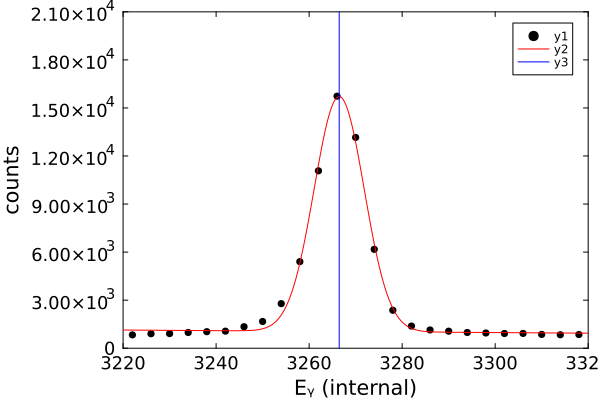

In [120]:
c0c1_p1_mean = 3270
c0c1_x1low,c0c1_x1high=c0c1_p1_mean-50,c0c1_p1_mean+50; ylow,yhigh=0,21000
c0c1_param1=[100,0.05,2e5,c0c1_p1_mean,1.0]

c0c1_p1,c0c1_s1,f=PhotopeakFit.gaussianfit(kc0c1,c0c1_x1low,c0c1_x1high,c0c1_param1)

for (i,val) in enumerate(c0c1_p1)
    println("P$i = ",val,"($(c0c1_s1[i]))")
end
println("Calibrated - Expected = $(c0c1_p1[4] - kliterature[1]) keV")

scatter(kc0c1[:,1],kc0c1[:,2],xlims=(c0c1_x1low,c0c1_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c0c1_p1),c0c1_x1low,c0c1_x1high,lc=:red)
vline!([c0c1_p1[4]],lc=:blue)

### Peak 2 (586)

P1 = 57578.15377486931(36470.7730949817)
P2 = -16.286854313273395(10.738775940848987)
P3 = 1.1453349764380602e6(19513.67803315316)
P4 = 3389.00656328634(0.0896871160749101)
P5 = 5.394781093238039(0.09510301488592043)
Calibrated - Expected = 2802.9965632863405 keV


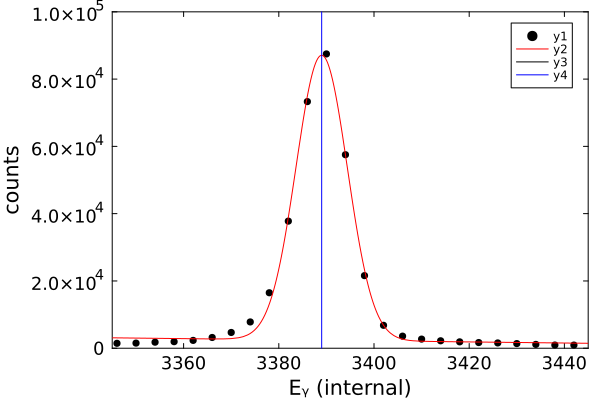

In [121]:
c0c1_p2_mean = 3395
c0c1_x1low,c0c1_x1high=c0c1_p2_mean-50,c0c1_p2_mean+50; ylow,yhigh=0,100000
c0c1_param1=[100,0.05,2e5,c0c1_p2_mean,1.0]

c0c1_p2,c0c1_s1,f=PhotopeakFit.gaussianfit(kc0c1,c0c1_x1low,c0c1_x1high,c0c1_param1)

for (i,val) in enumerate(c0c1_p2)
    println("P$i = ",val,"($(c0c1_s1[i]))")
end
println("Calibrated - Expected = $(c0c1_p2[4] - kliterature[2]) keV")

scatter(kc0c1[:,1],kc0c1[:,2],xlims=(c0c1_x1low,c0c1_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c0c1_p2),c0c1_x1low,c0c1_x1high,lc=:red)
vline!(kliterature,lc=:black)
vline!([c0c1_p2[4]],lc=:blue)

### Peak 3 (2013)

P1 = 11949.37562211544(37891.51797649726)
P2 = -0.9693380197194941(3.258690692149405)
P3 = 493954.55474375427(7319.316203125013)
P4 = 11633.543599120274(0.09834389267428986)
P5 = 7.245087347763742(0.10657771232773268)
Calibrated - Expected = 9620.093599120273 keV


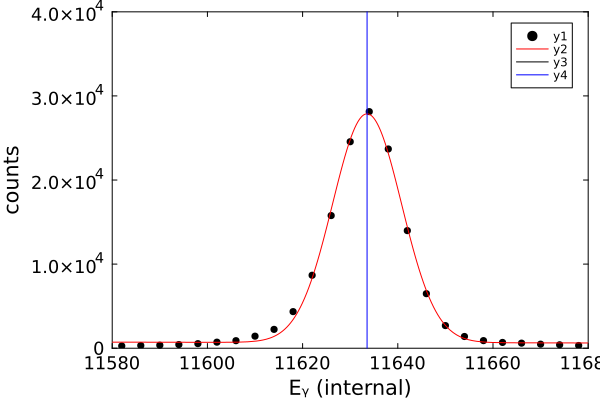

In [122]:
c0c1_p3_mean = 1.163e4
c0c1_x1low,c0c1_x1high=c0c1_p3_mean-50,c0c1_p3_mean+50; ylow,yhigh=0,40000
c0c1_param1=[100,0.05,2e5,c0c1_p3_mean,1.0]

c0c1_p3,c0c1_s1,f=PhotopeakFit.gaussianfit(kc0c1,c0c1_x1low,c0c1_x1high,c0c1_param1)

for (i,val) in enumerate(c0c1_p3)
    println("P$i = ",val,"($(c0c1_s1[i]))")
end
println("Calibrated - Expected = $(c0c1_p3[4] - kliterature[3]) keV")

scatter(kc0c1[:,1],kc0c1[:,2],xlims=(c0c1_x1low,c0c1_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c0c1_p3),c0c1_x1low,c0c1_x1high,lc=:red)
vline!(kliterature,lc=:black)
vline!([c0c1_p3[4]],lc=:blue)

## Crystal 2 (c0c2)

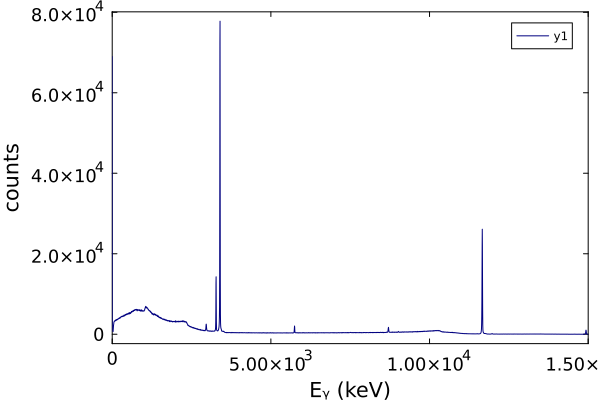

In [123]:
kc0c2 = readdlm("data/K47_T1_001_rawClover_crystal_02.txt",',')

# Plot uncalibrated histogram
plot(kc0c2[:,1],kc0c2[:,2],xlims=(0,15000),xlabel="Eᵧ (keV)")

### Peak 1 (565)

P1 = 1275.6053315273555(5084.779037168268)
P2 = -0.09103704427371946(1.5553677508272512)
P3 = 171928.58032463538(2713.683258310046)
P4 = 3272.6772412224145(0.07940407531481847)
P5 = 5.079029246189571(0.08374290997774021)
Calibrated - Expected = 2707.8872412224146 keV


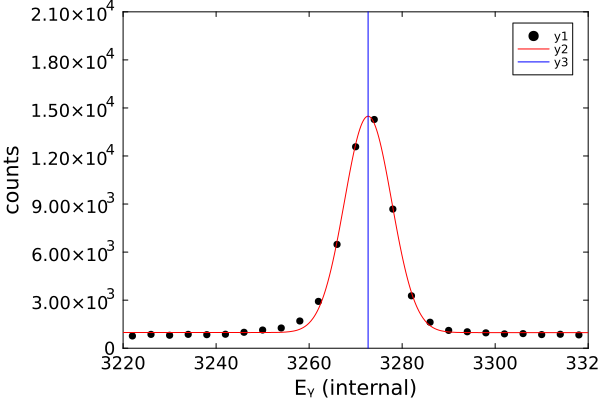

In [124]:
c0c2_p1_mean = 3270
c0c2_x1low,c0c2_x1high=c0c2_p1_mean-50,c0c2_p1_mean+50; ylow,yhigh=0,21000
c0c2_param1=[100,0.05,2e5,c0c2_p1_mean,1.0]

c0c2_p1,c0c2_s1,f=PhotopeakFit.gaussianfit(kc0c2,c0c2_x1low,c0c2_x1high,c0c2_param1)

for (i,val) in enumerate(c0c2_p1)
    println("P$i = ",val,"($(c0c2_s1[i]))")
end
println("Calibrated - Expected = $(c0c2_p1[4] - kliterature[1]) keV")

scatter(kc0c2[:,1],kc0c2[:,2],xlims=(c0c2_x1low,c0c2_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c0c2_p1),c0c2_x1low,c0c2_x1high,lc=:red)
vline!([c0c2_p1[4]],lc=:blue)

### Peak 2 (586)

P1 = 18454.42941739947(31116.21428551475)
P2 = -4.831881176619013(9.169821507253165)
P3 = 1.0075055296040422e6(16096.10449410672)
P4 = 3396.236744562828(0.08101679169878337)
P5 = 5.1252424649164725(0.08547440308232221)
Calibrated - Expected = 2810.2267445628277 keV


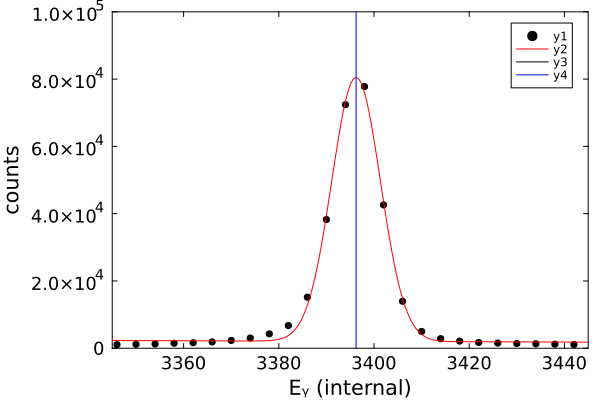

In [125]:
c0c2_p2_mean = 3395
c0c2_x1low,c0c2_x1high=c0c2_p2_mean-50,c0c2_p2_mean+50; ylow,yhigh=0,100000
c0c2_param1=[100,0.05,2e5,c0c2_p2_mean,1.0]

c0c2_p2,c0c2_s1,f=PhotopeakFit.gaussianfit(kc0c2,c0c2_x1low,c0c2_x1high,c0c2_param1)

for (i,val) in enumerate(c0c2_p2)
    println("P$i = ",val,"($(c0c2_s1[i]))")
end
println("Calibrated - Expected = $(c0c2_p2[4] - kliterature[2]) keV")

scatter(kc0c2[:,1],kc0c2[:,2],xlims=(c0c2_x1low,c0c2_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c0c2_p2),c0c2_x1low,c0c2_x1high,lc=:red)
vline!(kliterature,lc=:black)
vline!([c0c2_p2[4]],lc=:blue)

### Peak 3 (2013)

P1 = 53167.28337383024(51055.89463986942)
P2 = -4.501225381740102(4.379136215808428)
P3 = 456752.43946077547(9459.277222077533)
P4 = 11661.684996344444(0.13782947082045707)
P5 = 7.349886958453747(0.1499198570284464)
Calibrated - Expected = 9648.234996344443 keV


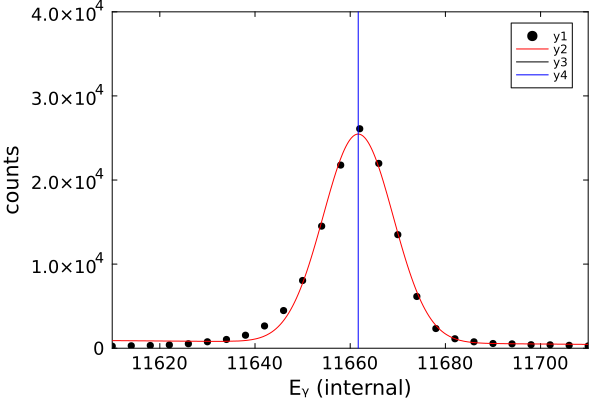

In [126]:
c0c2_p3_mean = 11660
c0c2_x1low,c0c2_x1high=c0c2_p3_mean-50,c0c2_p3_mean+50; ylow,yhigh=0,40000
c0c2_param1=[100,0.05,2e5,c0c2_p3_mean,1.0]

c0c2_p3,c0c2_s1,f=PhotopeakFit.gaussianfit(kc0c2,c0c2_x1low,c0c2_x1high,c0c2_param1)

for (i,val) in enumerate(c0c2_p3)
    println("P$i = ",val,"($(c0c2_s1[i]))")
end
println("Calibrated - Expected = $(c0c2_p3[4] - kliterature[3]) keV")

scatter(kc0c2[:,1],kc0c2[:,2],xlims=(c0c2_x1low,c0c2_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c0c2_p3),c0c2_x1low,c0c2_x1high,lc=:red)
vline!(kliterature,lc=:black)
vline!([c0c2_p3[4]],lc=:blue)

## Crystal 3 (c0c3)

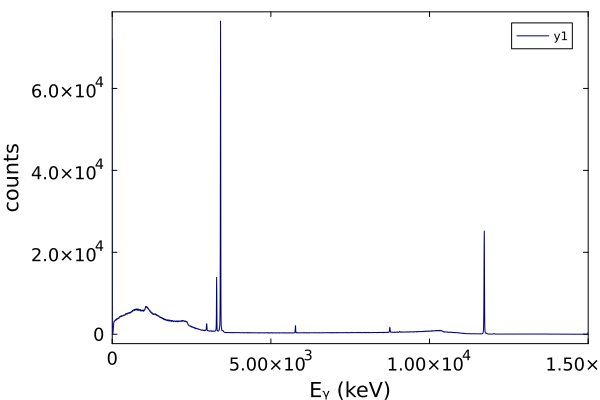

In [127]:
kc0c3 = readdlm("data/K47_T1_001_rawClover_crystal_03.txt",',') 

# Plot uncalibrated histogram
plot(kc0c3[:,1],kc0c3[:,2],xlims=(0,15000),xlabel="Eᵧ (keV)")

### Peak 1 (565)

P1 = 5152.83826887824(4691.4884752075395)
P2 = -1.28805033159538(1.4260683411258364)
P3 = 181452.73220705602(2643.4920967653557)
P4 = 3290.8841409306056(0.07899659785499698)
P5 = 5.554236456553466(0.08372286897807626)
Calibrated - Expected = 2726.0941409306056 keV


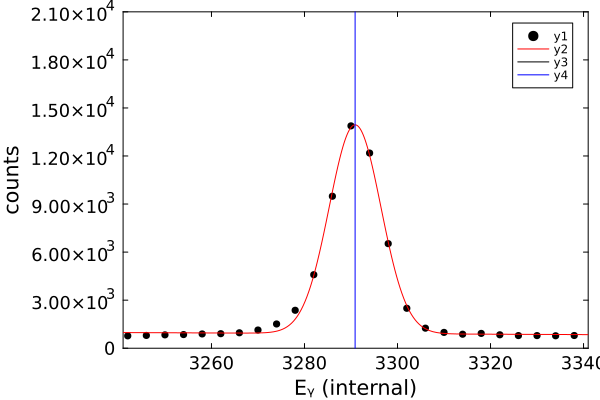

In [128]:
c0c3_p1_mean = 3291
c0c3_x1low,c0c3_x1high=c0c3_p1_mean-50,c0c3_p1_mean+50; ylow,yhigh=0,21000
c0c3_param1=[100,0.05,2e5,c0c3_p1_mean,1.0]

c0c3_p1,c0c3_s1,f=PhotopeakFit.gaussianfit(kc0c3,c0c3_x1low,c0c3_x1high,c0c3_param1)

for (i,val) in enumerate(c0c3_p1)
    println("P$i = ",val,"($(c0c3_s1[i]))")
end
println("Calibrated - Expected = $(c0c3_p1[4] - kliterature[1]) keV")

scatter(kc0c3[:,1],kc0c3[:,2],xlims=(c0c3_x1low,c0c3_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c0c3_p1),c0c3_x1low,c0c3_x1high,lc=:red)
vline!(kliterature,lc=:black)
vline!([c0c3_p1[4]],lc=:blue)

### Peak 2 (586)

P1 = 28328.94663283188(28177.12945352805)
P2 = -7.777858805406311(8.253457250413167)
P3 = 1.0487583328825263e6(15455.802499455402)
P4 = 3414.449443725297(0.08088595578413338)
P5 = 5.636848815430957(0.08580282311202822)
Calibrated - Expected = 2828.4394437252968 keV


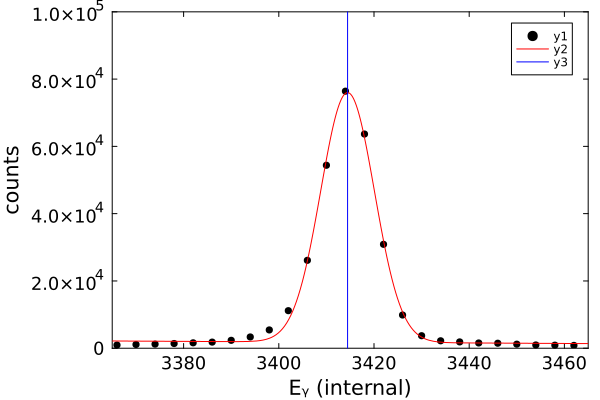

In [129]:
c0c3_p2_mean = 3415
c0c3_x1low,c0c3_x1high=c0c3_p2_mean-50,c0c3_p2_mean+50; ylow,yhigh=0,100000
c0c3_param1=[100,0.05,2e5,c0c3_p2_mean,1.0]

c0c3_p2,c0c3_s1,f=PhotopeakFit.gaussianfit(kc0c3,c0c3_x1low,c0c3_x1high,c0c3_param1)

for (i,val) in enumerate(c0c3_p2)
    println("P$i = ",val,"($(c0c3_s1[i]))")
end
println("Calibrated - Expected = $(c0c3_p2[4] - kliterature[2]) keV")

scatter(kc0c3[:,1],kc0c3[:,2],xlims=(c0c3_x1low,c0c3_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c0c3_p2),c0c3_x1low,c0c3_x1high,lc=:red)
vline!([c0c3_p2[4]],lc=:blue)

### Peak 3 (2013)

P1 = 34590.81548808116(29082.256971100902)
P2 = -2.9063473664418944(2.479930674342812)
P3 = 464729.37309583416(5712.935663788534)
P4 = 11724.50703669772(0.08389752037333102)
P5 = 7.487508436113268(0.09104703104159409)
Calibrated - Expected = 9711.057036697719 keV


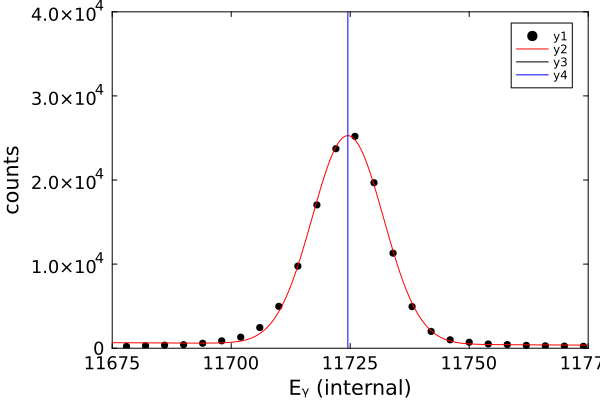

In [130]:
c0c3_p3_mean = 11725
c0c3_x1low,c0c3_x1high=c0c3_p3_mean-50,c0c3_p3_mean+50; ylow,yhigh=0,40000
c0c3_param1=[100,0.05,2e5,c0c3_p3_mean,1.0]

c0c3_p3,c0c3_s1,f=PhotopeakFit.gaussianfit(kc0c3,c0c3_x1low,c0c3_x1high,c0c3_param1)

for (i,val) in enumerate(c0c3_p3)
    println("P$i = ",val,"($(c0c3_s1[i]))")
end
println("Calibrated - Expected = $(c0c3_p3[4] - kliterature[3]) keV")

scatter(kc0c3[:,1],kc0c3[:,2],xlims=(c0c3_x1low,c0c3_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c0c3_p3),c0c3_x1low,c0c3_x1high,lc=:red)
vline!(kliterature,lc=:black)
vline!([c0c3_p3[4]],lc=:blue)

## Clover 0 Areas

In [131]:
c0_areas = [(c0c1_p1[3] + c0c2_p1[3] + c0c3_p1[3]), 
            (c0c1_p2[3] + c0c2_p2[3] + c0c3_p2[3]), 
            (c0c1_p3[3] + c0c2_p3[3] + c0c3_p3[3])]

3-element Vector{Float64}:
 551112.459447147
      3.2015988389246287e6
      1.415436367300364e6

# Clover 1

## Crystal 4 (c1c0)

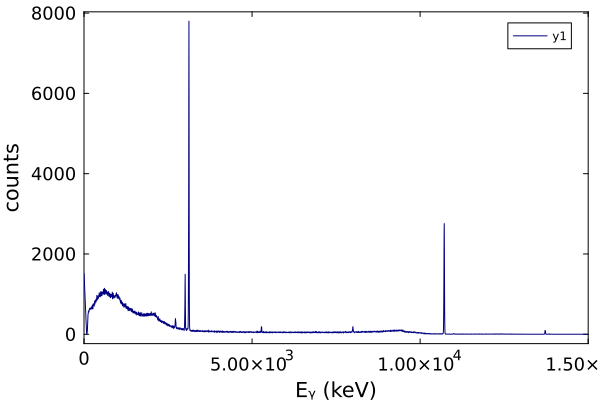

In [132]:
kc1c0 = readdlm("data/K47_T1_001_rawClover_crystal_04.txt",',')

# Plot uncalibrated histogram
plot(kc1c0[:,1],kc1c0[:,2],xlims=(0,15000),xlabel="Eᵧ (keV)")

### Peak 1 (565)

P1 = 923.40184226569(1145.7509332298284)
P2 = -0.264213428591686(0.3805402666842269)
P3 = 20060.057779513532(765.9897740217193)
P4 = 3008.691058471041(0.22733346199769522)
P5 = 6.246329899500001(0.24294331054618015)
Calibrated - Expected = 2443.901058471041 keV


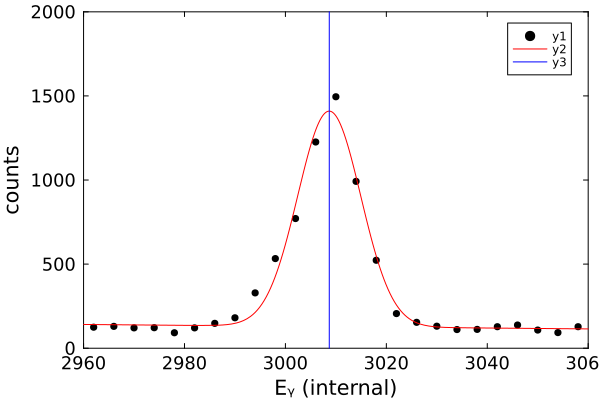

In [133]:
c1c0_p1_mean = 3010
c1c0_x1low,c1c0_x1high=c1c0_p1_mean-50,c1c0_p1_mean+50; ylow,yhigh=0,2000
c1c0_param1=[100,0.05,2e5,c1c0_p1_mean,1.0]

c1c0_p1,c1c0_s1,f=PhotopeakFit.gaussianfit(kc1c0,c1c0_x1low,c1c0_x1high,c1c0_param1)

for (i,val) in enumerate(c1c0_p1)
    println("P$i = ",val,"($(c1c0_s1[i]))")
end
println("Calibrated - Expected = $(c1c0_p1[4] - kliterature[1]) keV")

scatter(kc1c0[:,1],kc1c0[:,2],xlims=(c1c0_x1low,c1c0_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c1c0_p1),c1c0_x1low,c1c0_x1high,lc=:red)
vline!([c1c0_p1[4]],lc=:blue)

### Peak 2 (586)

P1 = 6222.646370533191(5710.987869767848)
P2 = -1.9320282156084356(1.8255158859099467)
P3 = 113455.38314588238(3644.144697906643)
P4 = 3121.432290314114(0.18841891973339467)
P5 = 6.174112230126154(0.20165751509621893)
Calibrated - Expected = 2535.4222903141144 keV


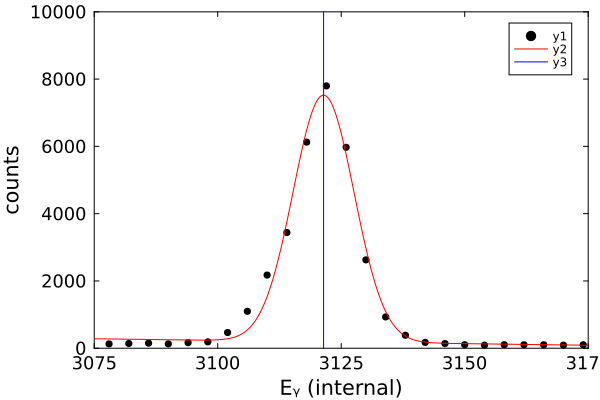

In [134]:
c1c0_p2_mean = 3125
c1c0_x1low,c1c0_x1high=c1c0_p2_mean-50,c1c0_p2_mean+50; ylow,yhigh=0,10000
c1c0_param1=[100,0.05,2e5,c1c0_p2_mean,1.0]

c1c0_p2,c1c0_s1,f=PhotopeakFit.gaussianfit(kc1c0,c1c0_x1low,c1c0_x1high,c1c0_param1)

for (i,val) in enumerate(c1c0_p2)
    println("P$i = ",val,"($(c1c0_s1[i]))")
end
println("Calibrated - Expected = $(c1c0_p2[4] - kliterature[2]) keV")

scatter(kc1c0[:,1],kc1c0[:,2],xlims=(c1c0_x1low,c1c0_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c1c0_p2),c1c0_x1low,c1c0_x1high,lc=:red)
vline!([c1c0_p2[4]],lc=:blue)

### Peak 3 (2013)

P1 = 3337.9285949338137(3735.91249840664)
P2 = -0.3093747579034907(0.3487467373230621)
P3 = 52627.25614000162(826.8668641952647)
P4 = 10716.371622421497(0.10993550095319102)
P5 = 7.7682814297193215(0.11980996552398124)
Calibrated - Expected = 8702.921622421496 keV


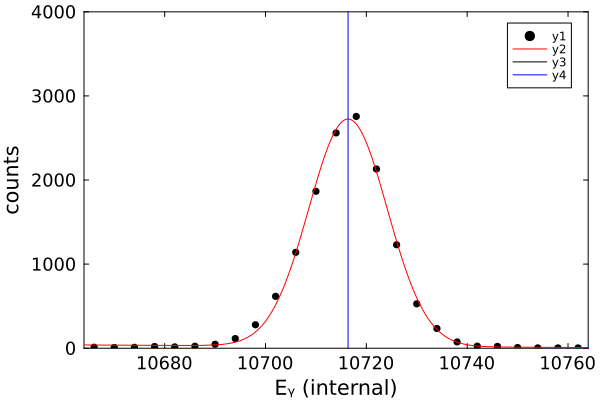

In [135]:
c1c0_p3_mean = 10714
c1c0_x1low,c1c0_x1high=c1c0_p3_mean-50,c1c0_p3_mean+50; ylow,yhigh=0,4000
c1c0_param1=[100,0.05,2e5,c1c0_p3_mean,1.0]

c1c0_p3,c1c0_s1,f=PhotopeakFit.gaussianfit(kc1c0,c1c0_x1low,c1c0_x1high,c1c0_param1)

for (i,val) in enumerate(c1c0_p3)
    println("P$i = ",val,"($(c1c0_s1[i]))")
end
println("Calibrated - Expected = $(c1c0_p3[4] - kliterature[3]) keV")

scatter(kc1c0[:,1],kc1c0[:,2],xlims=(c1c0_x1low,c1c0_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c1c0_p3),c1c0_x1low,c1c0_x1high,lc=:red)
vline!(kliterature,lc=:black)
vline!([c1c0_p3[4]],lc=:blue)

## Crystal 5 (c1c1)

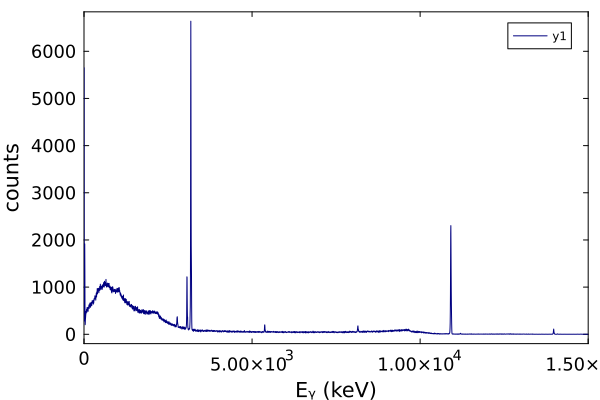

In [136]:
kc1c1 = readdlm("data/K47_T1_001_rawClover_crystal_05.txt",',')

# Plot uncalibrated histogram
plot(kc1c1[:,1],kc1c1[:,2],xlims=(0,15000),xlabel="Eᵧ (keV)")

### Peak 1 (565)

P1 = 498.98439312728857(1417.2606026269623)
P2 = -0.1143815581058498(0.4611807204668114)
P3 = 17192.699025779883(939.4639803143095)
P4 = 3064.278300677654(0.3264087140617833)
P5 = 6.350926577847798(0.35067339218939403)
Calibrated - Expected = 2499.488300677654 keV


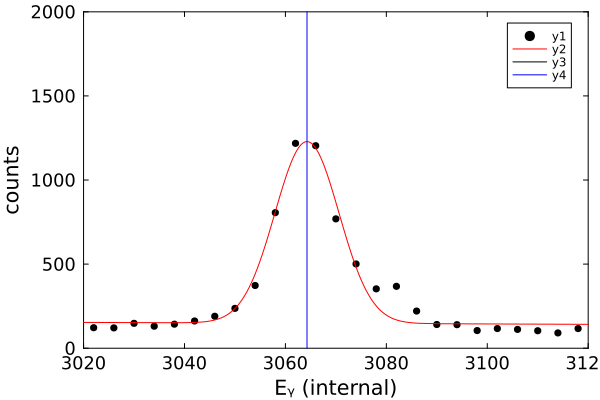

In [137]:
c1c1_p1_mean = 3070
c1c1_x1low,c1c1_x1high=c1c1_p1_mean-50,c1c1_p1_mean+50; ylow,yhigh=0,2000
c1c1_param1=[100,0.05,2e5,c1c1_p1_mean,1.0]

c1c1_p1,c1c1_s1,f=PhotopeakFit.gaussianfit(kc1c1,c1c1_x1low,c1c1_x1high,c1c1_param1)

for (i,val) in enumerate(c1c1_p1)
    println("P$i = ",val,"($(c1c1_s1[i]))")
end
println("Calibrated - Expected = $(c1c1_p1[4] - kliterature[1]) keV")

scatter(kc1c1[:,1],kc1c1[:,2],xlims=(c1c1_x1low,c1c1_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c1c1_p1),c1c1_x1low,c1c1_x1high,lc=:red)
vline!(kliterature,lc=:black)
vline!([c1c1_p1[4]],lc=:blue)

### Peak 2 (586)

P1 = -5807.4534738335515(8412.833566963853)
P2 = 1.9222462854607614(2.647319924923064)
P3 = 94683.47786392545(5412.525253276405)
P4 = 3178.633744243265(0.3462622931206496)
P5 = 6.3830926785928455(0.370585381867998)
Calibrated - Expected = 2592.623744243265 keV


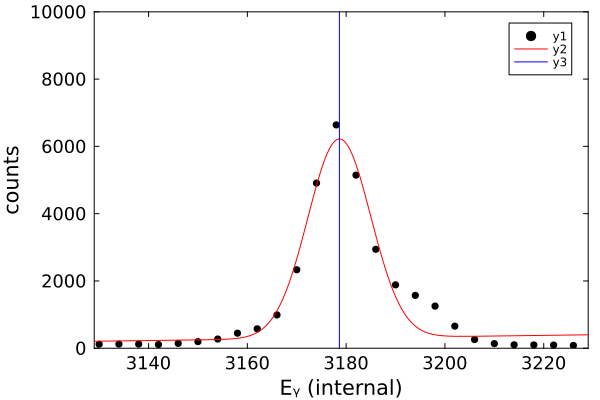

In [138]:
c1c1_p2_mean = 3179
c1c1_x1low,c1c1_x1high=c1c1_p2_mean-50,c1c1_p2_mean+50; ylow,yhigh=0,10000
c1c1_param1=[100,0.05,2e5,c1c1_p2_mean,1.0]

c1c1_p2,c1c1_s1,f=PhotopeakFit.gaussianfit(kc1c1,c1c1_x1low,c1c1_x1high,c1c1_param1)

for (i,val) in enumerate(c1c1_p2)
    println("P$i = ",val,"($(c1c1_s1[i]))")
end
println("Calibrated - Expected = $(c1c1_p2[4] - kliterature[2]) keV")

scatter(kc1c1[:,1],kc1c1[:,2],xlims=(c1c1_x1low,c1c1_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c1c1_p2),c1c1_x1low,c1c1_x1high,lc=:red)
vline!([c1c1_p2[4]],lc=:blue)

### Peak 3 (2013)

P1 = -4791.083001521053(7126.273959104671)
P2 = 0.4435215924720078(0.6529319421506169)
P3 = 48760.83522755473(1749.1479134179115)
P4 = 10913.783658247374(0.2781823543441001)
P5 = 9.01099425840227(0.30791249714125585)
Calibrated - Expected = 8900.333658247373 keV


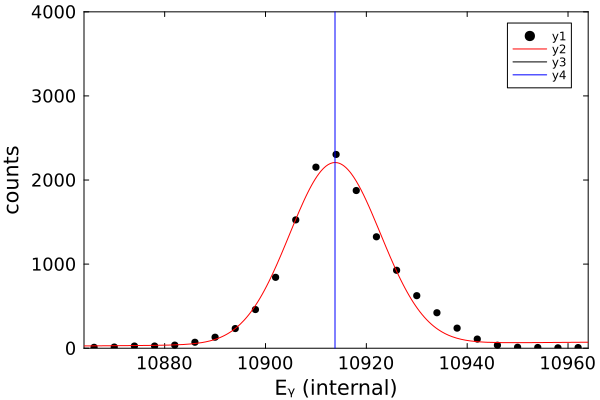

In [139]:
c1c1_p3_mean = 10914
c1c1_x1low,c1c1_x1high=c1c1_p3_mean-50,c1c1_p3_mean+50; ylow,yhigh=0,4000
c1c1_param1=[100,0.05,2e5,c1c1_p3_mean,1.0]

c1c1_p3,c1c1_s1,f=PhotopeakFit.gaussianfit(kc1c1,c1c1_x1low,c1c1_x1high,c1c1_param1)

for (i,val) in enumerate(c1c1_p3)
    println("P$i = ",val,"($(c1c1_s1[i]))")
end
println("Calibrated - Expected = $(c1c1_p3[4] - kliterature[3]) keV")

scatter(kc1c1[:,1],kc1c1[:,2],xlims=(c1c1_x1low,c1c1_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c1c1_p3),c1c1_x1low,c1c1_x1high,lc=:red)
vline!(kliterature,lc=:black)
vline!([c1c1_p3[4]],lc=:blue)

## Crystal 6 (c1c2)

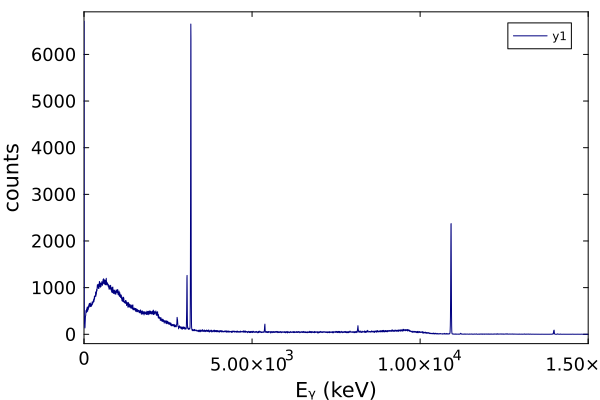

In [140]:
kc1c2 = readdlm("data/K47_T1_001_rawClover_crystal_06.txt",',')

# Plot uncalibrated histogram
plot(kc1c2[:,1],kc1c2[:,2],xlims=(0,15000),xlabel="Eᵧ (keV)")

### Peak 1 (565)

P1 = 558.8734963574991(826.1307410516745)
P2 = -0.14094543886074062(0.26960210403153534)
P3 = 18778.399517935708(532.9017097651409)
P4 = 3063.8797333236726(0.17354056078298427)
P5 = 6.54215634348794(0.18669530114372182)
Calibrated - Expected = 2499.0897333236726 keV


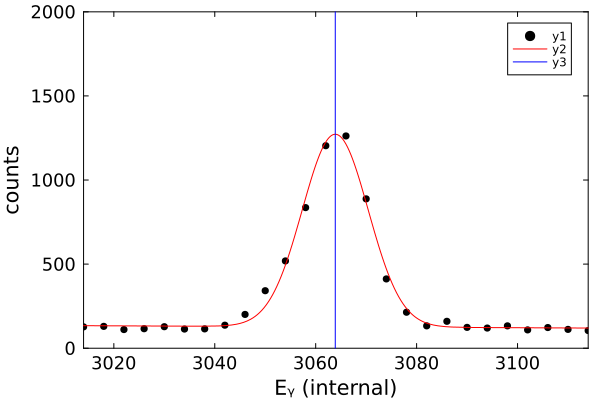

In [141]:
c1c2_p1_mean = 3064
c1c2_x1low,c1c2_x1high=c1c2_p1_mean-50,c1c2_p1_mean+50; ylow,yhigh=0,2000
c1c2_param1=[100,0.05,2e5,c1c2_p1_mean,5]

c1c2_p1,c1c2_s1,f=PhotopeakFit.gaussianfit(kc1c2,c1c2_x1low,c1c2_x1high,c1c2_param1)

for (i,val) in enumerate(c1c2_p1)
    println("P$i = ",val,"($(c1c2_s1[i]))")
end
println("Calibrated - Expected = $(c1c2_p1[4] - kliterature[1]) keV")

scatter(kc1c2[:,1],kc1c2[:,2],xlims=(c1c2_x1low,c1c2_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c1c2_p1),c1c2_x1low,c1c2_x1high,lc=:red)
vline!([c1c2_p1[4]],lc=:blue)

### Peak 2 (586)

P1 = 2897.2779673515033(3301.8441833383376)
P2 = -0.8677832241760429(1.0390809662636862)
P3 = 110093.71190806528(2202.139580985044)
P4 = 3178.974365948028(0.1258145055578442)
P5 = 6.70503067295451(0.13518850834078022)
Calibrated - Expected = 2592.964365948028 keV


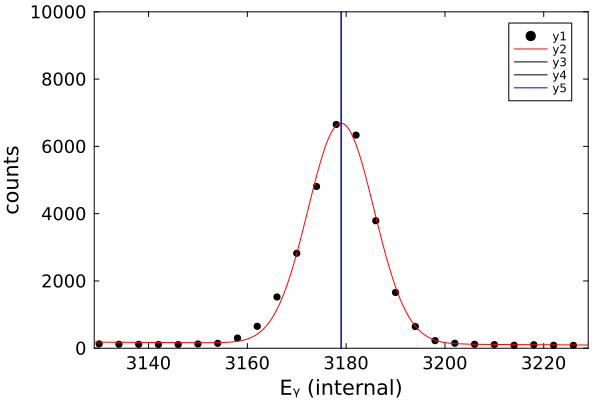

In [142]:
c1c2_p2_mean = 3179
c1c2_x1low,c1c2_x1high=c1c2_p2_mean-50,c1c2_p2_mean+50; ylow,yhigh=0,10000
c1c2_param1=[100,0.05,2e5,c1c2_p2_mean,1.0]

c1c2_p2,c1c2_s1,f=PhotopeakFit.gaussianfit(kc1c2,c1c2_x1low,c1c2_x1high,c1c2_param1)

for (i,val) in enumerate(c1c2_p2)
    println("P$i = ",val,"($(c1c2_s1[i]))")
end
println("Calibrated - Expected = $(c1c2_p2[4] - kliterature[2]) keV")

scatter(kc1c2[:,1],kc1c2[:,2],xlims=(c1c2_x1low,c1c2_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c1c2_p2),c1c2_x1low,c1c2_x1high,lc=:red)
vline!(kliterature,lc=:black)
vline!([c1c2_p2_mean],lc=:black)
vline!([c1c2_p2[4]],lc=:blue)

### Peak 3 (2013)

P1 = 3159.5301096661597(3479.5926525775008)
P2 = -0.28742063546259783(0.31893681097736565)
P3 = 49365.871759541085(796.3310974596682)
P4 = 10919.191470330807(0.11681479527506639)
P5 = 8.285078086908737(0.12877513949035363)
Calibrated - Expected = 8905.741470330806 keV


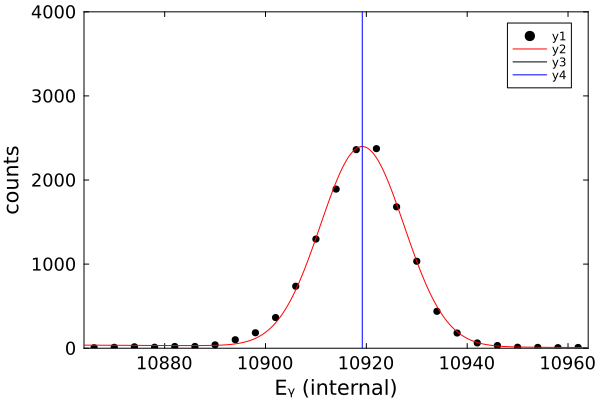

In [143]:
c1c2_p3_mean = 10914
c1c2_x1low,c1c2_x1high=c1c2_p3_mean-50,c1c2_p3_mean+50; ylow,yhigh=0,4000
c1c2_param1=[100,0.05,2e5,c1c2_p3_mean,1.0]

c1c2_p3,c1c2_s1,f=PhotopeakFit.gaussianfit(kc1c2,c1c2_x1low,c1c2_x1high,c1c2_param1)

for (i,val) in enumerate(c1c2_p3)
    println("P$i = ",val,"($(c1c2_s1[i]))")
end
println("Calibrated - Expected = $(c1c2_p3[4] - kliterature[3]) keV")

scatter(kc1c2[:,1],kc1c2[:,2],xlims=(c1c2_x1low,c1c2_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c1c2_p3),c1c2_x1low,c1c2_x1high,lc=:red)
vline!(kliterature,lc=:black)
vline!([c1c2_p3[4]],lc=:blue)

## Crystal 7 (c1c3)

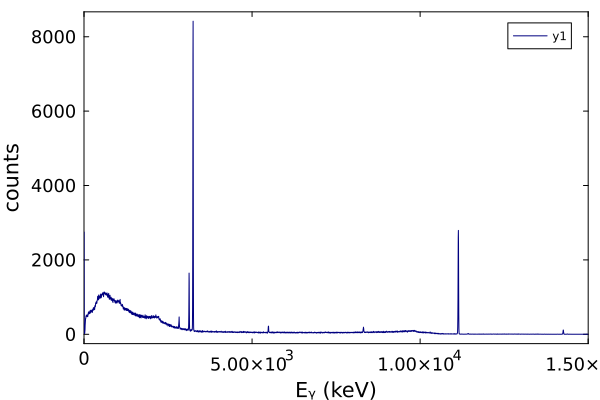

In [144]:
kc1c3 = readdlm("data/K47_T1_001_rawClover_crystal_07.txt",',')

# Plot uncalibrated histogram
plot(kc1c3[:,1],kc1c3[:,2],xlims=(0,15000),xlabel="Eᵧ (keV)")

### Peak 1 (565)

P1 = 1019.5232008107773(617.0160886721807)
P2 = -0.28751511948986347(0.1973934779515532)
P3 = 20124.906271453583(354.31565854933837)
P4 = 3126.930253174222(0.09185047128724676)
P5 = 5.2981835364971435(0.09705696158908564)
Calibrated - Expected = 2562.140253174222 keV


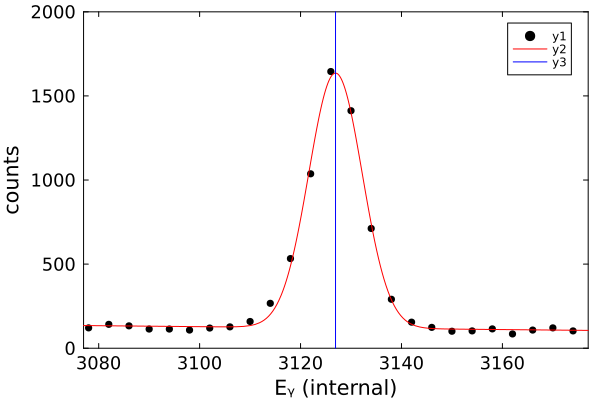

In [145]:
c1c3_p1_mean = 3127
c1c3_x1low,c1c3_x1high=c1c3_p1_mean-50,c1c3_p1_mean+50; ylow,yhigh=0,2000
c1c3_param1=[100,0.05,2e5,c1c3_p1_mean,5.0]

c1c3_p1,c1c3_s1,f=PhotopeakFit.gaussianfit(kc1c3,c1c3_x1low,c1c3_x1high,c1c3_param1)

for (i,val) in enumerate(c1c3_p1)
    println("P$i = ",val,"($(c1c3_s1[i]))")
end
println("Calibrated - Expected = $(c1c3_p1[4] - kliterature[1]) keV")

scatter(kc1c3[:,1],kc1c3[:,2],xlims=(c1c3_x1low,c1c3_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c1c3_p1),c1c3_x1low,c1c3_x1high,lc=:red)
vline!([c1c3_p1[4]],lc=:blue)

### Peak 2 (586)

P1 = 3438.477993710069(3860.1259659092702)
P2 = -1.0193645760459396(1.1899549202291748)
P3 = 117096.70633440005(2099.295237385231)
P4 = 3244.5401452753727(0.09690481740731098)
P5 = 5.585892807211649(0.10301660187054994)
Calibrated - Expected = 2658.530145275373 keV


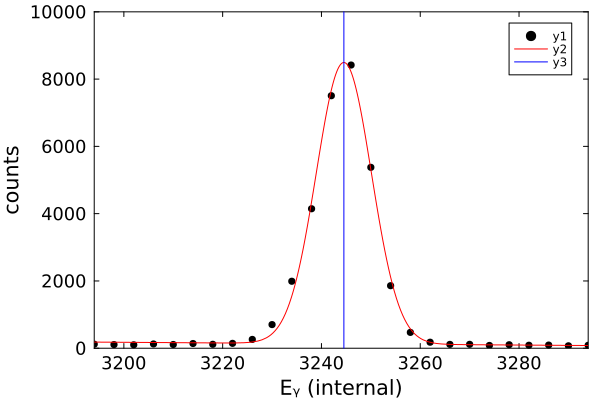

In [146]:
c1c3_p2_mean = 3244
c1c3_x1low,c1c3_x1high=c1c3_p2_mean-50,c1c3_p2_mean+50; ylow,yhigh=0,10000
c1c3_param1=[100,0.05,2e5,c1c3_p2_mean,5.0]

c1c3_p2,c1c3_s1,f=PhotopeakFit.gaussianfit(kc1c3,c1c3_x1low,c1c3_x1high,c1c3_param1)

for (i,val) in enumerate(c1c3_p2)
    println("P$i = ",val,"($(c1c3_s1[i]))")
end
println("Calibrated - Expected = $(c1c3_p2[4] - kliterature[2]) keV")

scatter(kc1c3[:,1],kc1c3[:,2],xlims=(c1c3_x1low,c1c3_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c1c3_p2),c1c3_x1low,c1c3_x1high,lc=:red)
vline!([c1c3_p2[4]],lc=:blue)

### Peak 3 (2013)

P1 = 4016.9621615666874(3785.886792838134)
P2 = -0.35938683365982066(0.3398863342156283)
P3 = 53240.83917440276(778.2402996708798)
P4 = 11137.042182349553(0.09924488908670372)
P5 = 7.428910214685877(0.10759838918585435)
Calibrated - Expected = 9123.592182349552 keV


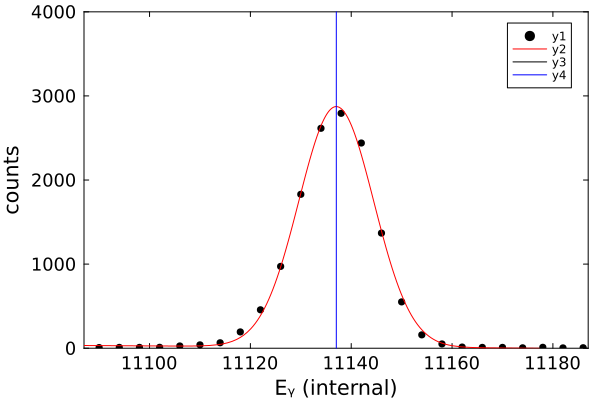

In [147]:
c1c3_p3_mean = 11137
c1c3_x1low,c1c3_x1high=c1c3_p3_mean-50,c1c3_p3_mean+50; ylow,yhigh=0,4000
c1c3_param1=[100,0.05,2e5,c1c3_p3_mean,5.0]

c1c3_p3,c1c3_s1,f=PhotopeakFit.gaussianfit(kc1c3,c1c3_x1low,c1c3_x1high,c1c3_param1)

for (i,val) in enumerate(c1c3_p3)
    println("P$i = ",val,"($(c1c3_s1[i]))")
end
println("Calibrated - Expected = $(c1c3_p3[4] - kliterature[3]) keV")

scatter(kc1c3[:,1],kc1c3[:,2],xlims=(c1c3_x1low,c1c3_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c1c3_p3),c1c3_x1low,c1c3_x1high,lc=:red)
vline!(kliterature,lc=:black)
vline!([c1c3_p3[4]],lc=:blue)

## Clover 1 Areas

In [148]:
c1_areas = [(c1c1_p1[3] + c1c2_p1[3] + c1c3_p1[3]), 
            (c1c1_p2[3] + c1c2_p2[3] + c1c3_p2[3]), 
            (c1c1_p3[3] + c1c2_p3[3] + c1c3_p3[3])]

3-element Vector{Float64}:
  56096.00481516917
 321873.89610639075
 151367.54616149858

# Clover 2

## Crystal 8 (c2c0)

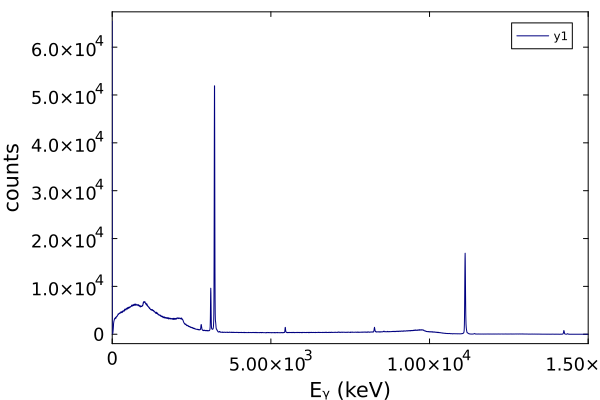

In [149]:
kc2c0 = readdlm("data/K47_T1_001_rawClover_crystal_08.txt",',')

# Plot uncalibrated histogram
plot(kc2c0[:,1],kc2c0[:,2],xlims=(0,15000),xlabel="Eᵧ (keV)")

### Peak 1 (565)

P1 = -9500.692866434794(1883.913446630189)
P2 = 3.3773046857504045(0.6065220390580711)
P3 = 184006.45214319843(1564.237021226426)
P4 = 3106.1672129172243(0.06402588349090958)
P5 = 8.616132734483415(0.07048628788056582)
Calibrated - Expected = 2541.3772129172244 keV


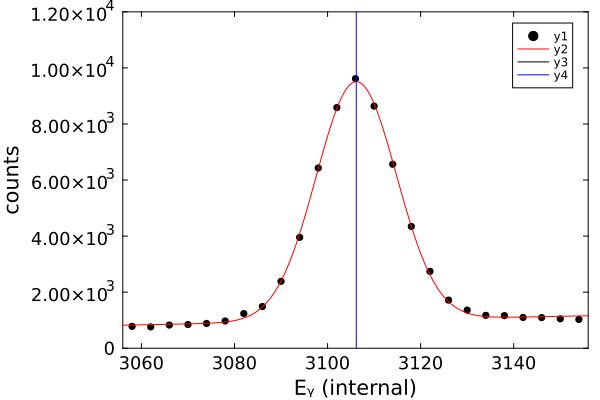

In [150]:
c2c0_p1_mean = 3106
c2c0_x1low,c2c0_x1high=c2c0_p1_mean-50,c2c0_p1_mean+50; ylow,yhigh=0,12000
c2c0_param1=[100,0.05,2e5,c2c0_p1_mean,5.0]

c2c0_p1,c2c0_s1,f=PhotopeakFit.gaussianfit(kc2c0,c2c0_x1low,c2c0_x1high,c2c0_param1)

for (i,val) in enumerate(c2c0_p1)
    println("P$i = ",val,"($(c2c0_s1[i]))")
end
println("Calibrated - Expected = $(c2c0_p1[4] - kliterature[1]) keV")

scatter(kc2c0[:,1],kc2c0[:,2],xlims=(c2c0_x1low,c2c0_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c2c0_p1),c2c0_x1low,c2c0_x1high,lc=:red)
vline!(kliterature,lc=:black)
vline!([c2c0_p1[4]],lc=:blue)

### Peak 2 (586)

P1 = -27620.499419290438(11547.298026093793)
P2 = 9.218058938301565(3.581215496525778)
P3 = 1.0701578381517695e6(8590.257076954897)
P4 = 3223.769991686172(0.05846124766959156)
P5 = 8.362977978562368(0.06444356228562134)
Calibrated - Expected = 2637.759991686172 keV


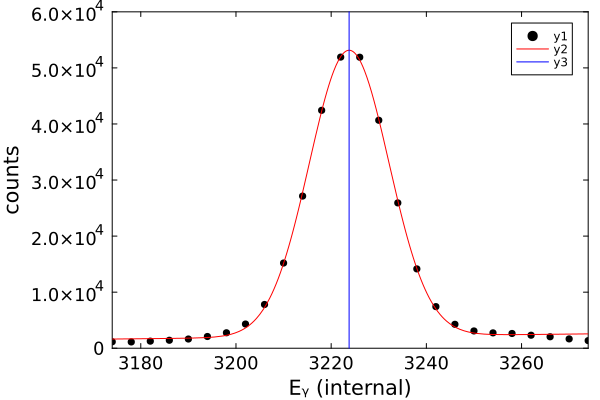

In [151]:
c2c0_p2_mean = 3224
c2c0_x1low,c2c0_x1high=c2c0_p2_mean-50,c2c0_p2_mean+50; ylow,yhigh=0,60000
c2c0_param1=[100,0.05,2e5,c2c0_p2_mean,5.0]

c2c0_p2,c2c0_s1,f=PhotopeakFit.gaussianfit(kc2c0,c2c0_x1low,c2c0_x1high,c2c0_param1)

for (i,val) in enumerate(c2c0_p2)
    println("P$i = ",val,"($(c2c0_s1[i]))")
end
println("Calibrated - Expected = $(c2c0_p2[4] - kliterature[2]) keV")

scatter(kc2c0[:,1],kc2c0[:,2],xlims=(c2c0_x1low,c2c0_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c2c0_p2),c2c0_x1low,c2c0_x1high,lc=:red)
vline!([c2c0_p2[4]],lc=:blue)

### Peak 3 (2013)

P1 = -116237.7834436181(22659.042734122075)
P2 = 10.521083169581786(2.0372399613628596)
P3 = 440948.2027496598(6619.449139415302)
P4 = 11121.76155038824(0.13097026043080545)
P5 = 11.085895501800707(0.1497148925676616)
Calibrated - Expected = 9108.31155038824 keV


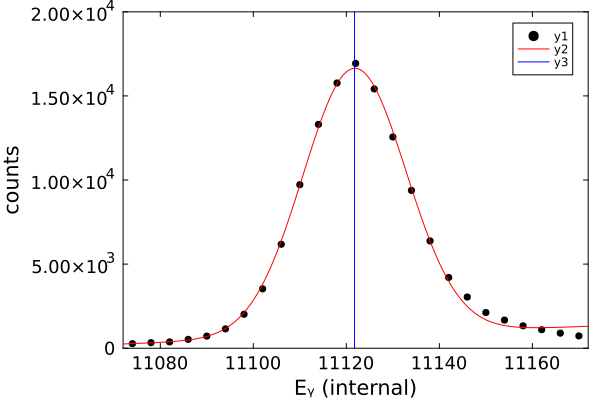

In [152]:
c2c0_p3_mean = 11122
c2c0_x1low,c2c0_x1high=c2c0_p3_mean-50,c2c0_p3_mean+50; ylow,yhigh=0,20000
c2c0_param1=[100,0.05,2e5,c2c0_p3_mean,5.0]

c2c0_p3,c2c0_s1,f=PhotopeakFit.gaussianfit(kc2c0,c2c0_x1low,c2c0_x1high,c2c0_param1)

for (i,val) in enumerate(c2c0_p3)
    println("P$i = ",val,"($(c2c0_s1[i]))")
end
println("Calibrated - Expected = $(c2c0_p3[4] - kliterature[3]) keV")

scatter(kc2c0[:,1],kc2c0[:,2],xlims=(c2c0_x1low,c2c0_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c2c0_p3),c2c0_x1low,c2c0_x1high,lc=:red)
vline!([c2c0_p3[4]],lc=:blue)

## Crystal 9 (c2c1)

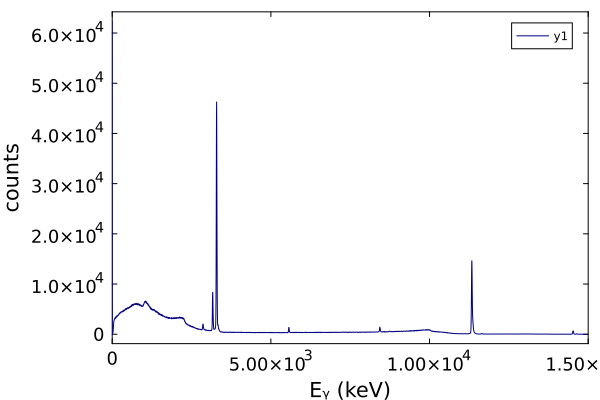

In [153]:
kc2c1 = readdlm("data/K47_T1_001_rawClover_crystal_09.txt",',')

# Plot uncalibrated histogram
plot(kc2c1[:,1],kc2c1[:,2],xlims=(0,15000),xlabel="Eᵧ (keV)")

### Peak 1 (565)

P1 = -14966.319584008783(5557.409498831103)
P2 = 5.028781207077132(1.7559195445010973)
P3 = 179955.88499625513(5054.647176659732)
P4 = 3167.1965994931115(0.22877711445305626)
P5 = 9.773859050643813(0.25613934608036043)
Calibrated - Expected = 2602.4065994931116 keV


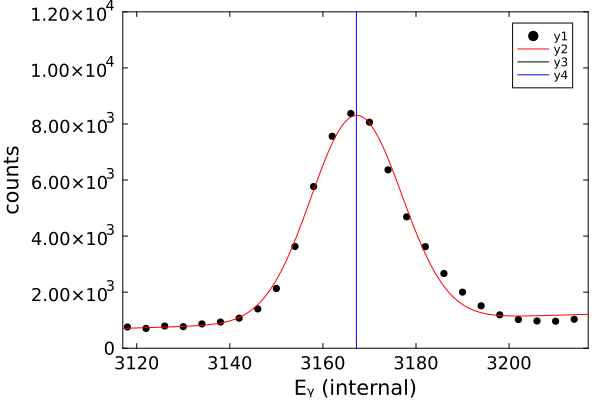

In [154]:
c2c1_p1_mean = 3167
c2c1_x1low,c2c1_x1high=c2c1_p1_mean-50,c2c1_p1_mean+50; ylow,yhigh=0,12000
c2c1_param1=[100,0.05,2e5,c2c1_p1_mean,5.0]

c2c1_p1,c2c1_s1,f=PhotopeakFit.gaussianfit(kc2c1,c2c1_x1low,c2c1_x1high,c2c1_param1)

for (i,val) in enumerate(c2c1_p1)
    println("P$i = ",val,"($(c2c1_s1[i]))")
end
println("Calibrated - Expected = $(c2c1_p1[4] - kliterature[1]) keV")

scatter(kc2c1[:,1],kc2c1[:,2],xlims=(c2c1_x1low,c2c1_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c2c1_p1),c2c1_x1low,c2c1_x1high,lc=:red)
vline!(kliterature,lc=:black)
vline!([c2c1_p1[4]],lc=:blue)

### Peak 2 (586)

P1 = -32177.396257933495(9816.62076618752)
P2 = 10.272167496336742(2.9832616455874437)
P3 = 1.0821887791333303e6(8561.879261947704)
P4 = 3289.6976437039(0.06437009603161976)
P5 = 9.741546981439772(0.07200478616039584)
Calibrated - Expected = 2703.6876437039 keV


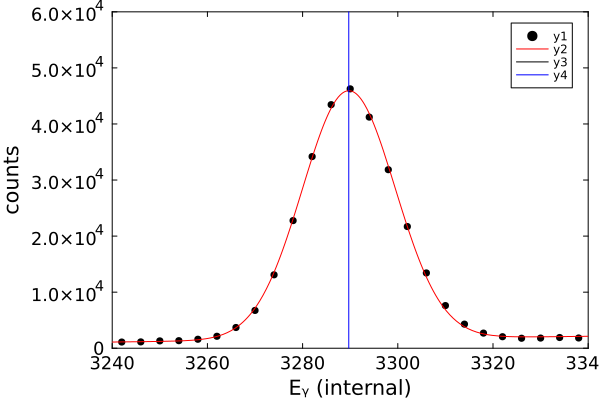

In [155]:
c2c1_p2_mean = 3290
c2c1_x1low,c2c1_x1high=c2c1_p2_mean-50,c2c1_p2_mean+50; ylow,yhigh=0,60000
c2c1_param1=[100,0.05,2e5,c2c1_p2_mean,5.0]

c2c1_p2,c2c1_s1,f=PhotopeakFit.gaussianfit(kc2c1,c2c1_x1low,c2c1_x1high,c2c1_param1)

for (i,val) in enumerate(c2c1_p2)
    println("P$i = ",val,"($(c2c1_s1[i]))")
end
println("Calibrated - Expected = $(c2c1_p2[4] - kliterature[2]) keV")

scatter(kc2c1[:,1],kc2c1[:,2],xlims=(c2c1_x1low,c2c1_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c2c1_p2),c2c1_x1low,c2c1_x1high,lc=:red)
vline!(kliterature,lc=:black)
vline!([c2c1_p2[4]],lc=:blue)

### Peak 3 (2013)

P1 = -243977.4940297556(31328.381312046487)
P2 = 21.628970542091917(2.7638303183871518)
P3 = 385750.3715172519(9244.585379342167)
P4 = 11333.314939068805(0.21176035858668776)
P5 = 11.401517976895445(0.24349011088856298)
Calibrated - Expected = 9319.864939068804 keV


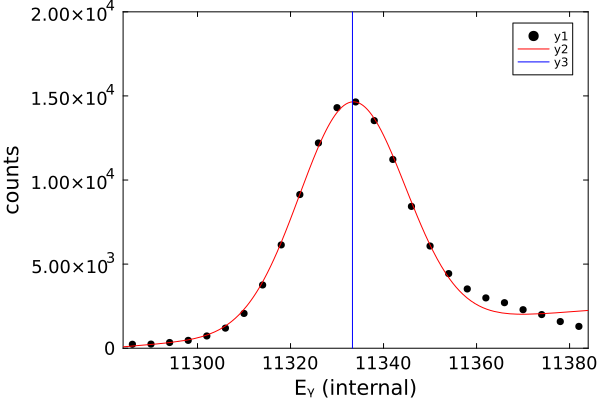

In [156]:
c2c1_p3_mean = 11334
c2c1_x1low,c2c1_x1high=c2c1_p3_mean-50,c2c1_p3_mean+50; ylow,yhigh=0,20000
c2c1_param1=[100,0.05,2e5,c2c1_p3_mean,5.0]

c2c1_p3,c2c1_s1,f=PhotopeakFit.gaussianfit(kc2c1,c2c1_x1low,c2c1_x1high,c2c1_param1)

for (i,val) in enumerate(c2c1_p3)
    println("P$i = ",val,"($(c2c1_s1[i]))")
end
println("Calibrated - Expected = $(c2c1_p3[4] - kliterature[3]) keV")

scatter(kc2c1[:,1],kc2c1[:,2],xlims=(c2c1_x1low,c2c1_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c2c1_p3),c2c1_x1low,c2c1_x1high,lc=:red)
vline!([c2c1_p3[4]],lc=:blue)

## Crystal 10 (c2c2)

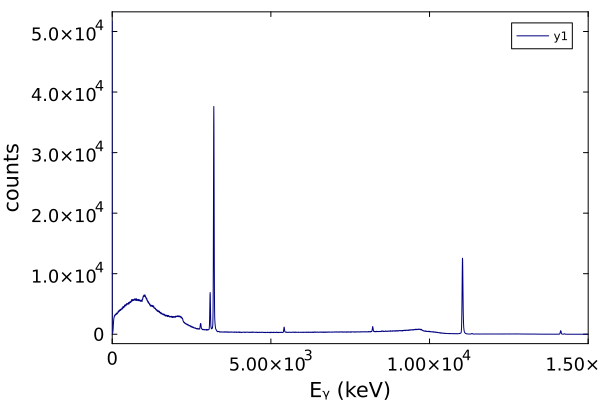

In [157]:
kc2c2 = readdlm("data/K47_T1_001_rawClover_crystal_10.txt",',')

# Plot uncalibrated histogram
plot(kc2c2[:,1],kc2c2[:,2],xlims=(0,15000),xlabel="Eᵧ (keV)")

### Peak 1 (565)

P1 = -6070.085387970719(1391.8042356075205)
P2 = 2.255701335516446(0.4509191329281654)
P3 = 152427.21502478208(1343.4594284342566)
P4 = 3085.7203966562806(0.07340460923327574)
P5 = 10.144275733270812(0.08261595866692852)
Calibrated - Expected = 2520.9303966562807 keV


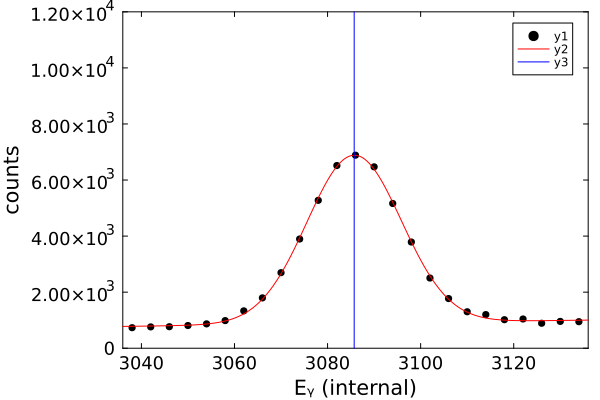

In [158]:
c2c2_p1_mean = 3086
c2c2_x1low,c2c2_x1high=c2c2_p1_mean-50,c2c2_p1_mean+50; ylow,yhigh=0,12000
c2c2_param1=[100,0.05,2e5,c2c2_p1_mean,5.0]

c2c2_p1,c2c2_s1,f=PhotopeakFit.gaussianfit(kc2c2,c2c2_x1low,c2c2_x1high,c2c2_param1)

for (i,val) in enumerate(c2c2_p1)
    println("P$i = ",val,"($(c2c2_s1[i]))")
end
println("Calibrated - Expected = $(c2c2_p1[4] - kliterature[1]) keV")

scatter(kc2c2[:,1],kc2c2[:,2],xlims=(c2c2_x1low,c2c2_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c2c2_p1),c2c2_x1low,c2c2_x1high,lc=:red)
vline!([c2c2_p1[4]],lc=:blue)

### Peak 2 (586)

P1 = -14205.177802558668(8430.1067622103)
P2 = 4.93041909819461(2.6322306670405093)
P3 = 890709.9518759525(7690.9159985111355)
P4 = 3201.646997943368(0.0710573588334942)
P5 = 9.933878741631219(0.07971665871943914)
Calibrated - Expected = 2615.6369979433684 keV


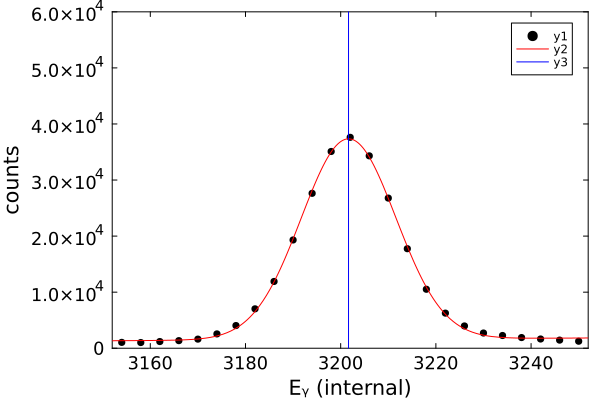

In [159]:
c2c2_p2_mean = 3202
c2c2_x1low,c2c2_x1high=c2c2_p2_mean-50,c2c2_p2_mean+50; ylow,yhigh=0,60000
c2c2_param1=[100,0.05,2e5,c2c2_p2_mean,5.0]

c2c2_p2,c2c2_s1,f=PhotopeakFit.gaussianfit(kc2c2,c2c2_x1low,c2c2_x1high,c2c2_param1)

for (i,val) in enumerate(c2c2_p2)
    println("P$i = ",val,"($(c2c2_s1[i]))")
end
println("Calibrated - Expected = $(c2c2_p2[4] - kliterature[2]) keV")

scatter(kc2c2[:,1],kc2c2[:,2],xlims=(c2c2_x1low,c2c2_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c2c2_p2),c2c2_x1low,c2c2_x1high,lc=:red)
vline!([c2c2_p2[4]],lc=:blue)

### Peak 3 (2013)

P1 = -94927.32139895839(14430.128720642584)
P2 = 8.655690521021793(1.3070118056503062)
P3 = 393552.7109072044(5012.633552346741)
P4 = 11039.82307628(0.11477145351630362)
P5 = 13.178899106418715(0.13890835147203698)
Calibrated - Expected = 9026.373076279999 keV


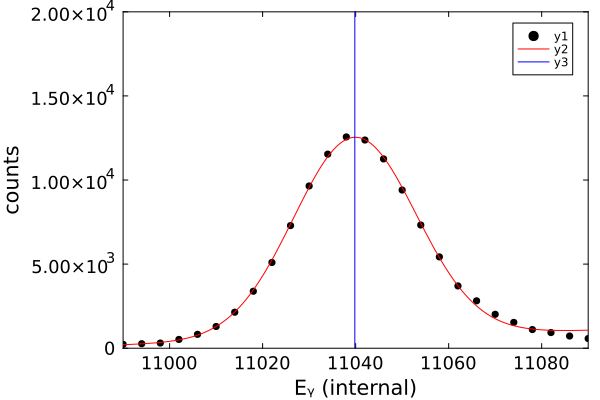

In [160]:
c2c2_p3_mean = 11040
c2c2_x1low,c2c2_x1high=c2c2_p3_mean-50,c2c2_p3_mean+50; ylow,yhigh=0,20000
c2c2_param1=[100,0.05,2e5,c2c2_p3_mean,5.0]

c2c2_p3,c2c2_s1,f=PhotopeakFit.gaussianfit(kc2c2,c2c2_x1low,c2c2_x1high,c2c2_param1)

for (i,val) in enumerate(c2c2_p3)
    println("P$i = ",val,"($(c2c2_s1[i]))")
end
println("Calibrated - Expected = $(c2c2_p3[4] - kliterature[3]) keV")

scatter(kc2c2[:,1],kc2c2[:,2],xlims=(c2c2_x1low,c2c2_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c2c2_p3),c2c2_x1low,c2c2_x1high,lc=:red)
vline!([c2c2_p3[4]],lc=:blue)

## Crystal 11 (c2c3)

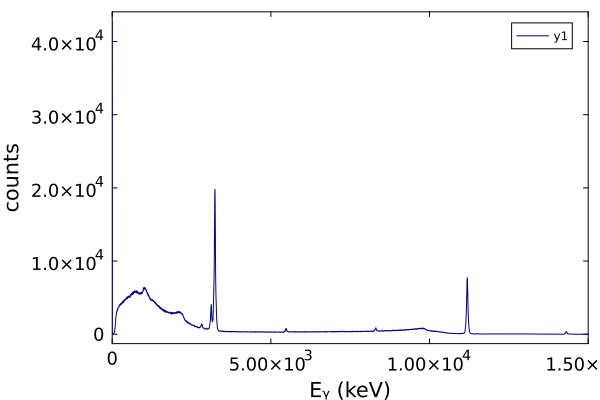

In [161]:
kc2c3 = readdlm("data/K47_T1_001_rawClover_crystal_11.txt",',') 

# Plot uncalibrated histogram
plot(kc2c3[:,1],kc2c3[:,2],xlims=(0,15000),xlabel="Eᵧ (keV)")

### Peak 1 (565)

P1 = -10614.337050855474(2134.5964956425782)
P2 = 3.8917992032179356(0.6850873016514736)
P3 = 87163.91661228523(2914.238878376644)
P4 = 3118.9683597280623(0.31423256873207783)
P5 = 13.954961996275788(0.38284640896625294)
Calibrated - Expected = 2554.1783597280623 keV


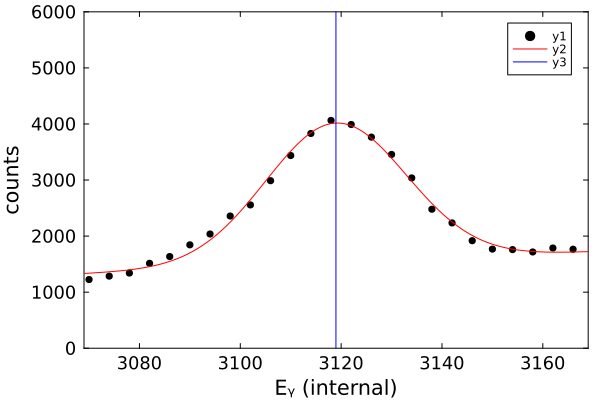

In [162]:
c2c3_p1_mean = 3119
c2c3_x1low,c2c3_x1high=c2c3_p1_mean-50,c2c3_p1_mean+50; ylow,yhigh=0,6000
c2c3_param1=[100,0.05,2e5,c2c3_p1_mean,5.0]

c2c3_p1,c2c3_s1,f=PhotopeakFit.gaussianfit(kc2c3,c2c3_x1low,c2c3_x1high,c2c3_param1)

for (i,val) in enumerate(c2c3_p1)
    println("P$i = ",val,"($(c2c3_s1[i]))")
end
println("Calibrated - Expected = $(c2c3_p1[4] - kliterature[1]) keV")

scatter(kc2c3[:,1],kc2c3[:,2],xlims=(c2c3_x1low,c2c3_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c2c3_p1),c2c3_x1low,c2c3_x1high,lc=:red)
vline!([c2c3_p1[4]],lc=:blue)

### Peak 2 (586)

P1 = 17242.53457659523(3060.016382409211)
P2 = -5.270277613955862(0.9394343383985284)
P3 = 1.2688790878649496e6(22305.888501177447)
P4 = 3236.1303775557644(0.178149249188332)
P5 = 40.78690909719042(0.716375643174827)
Calibrated - Expected = 2650.120377555764 keV


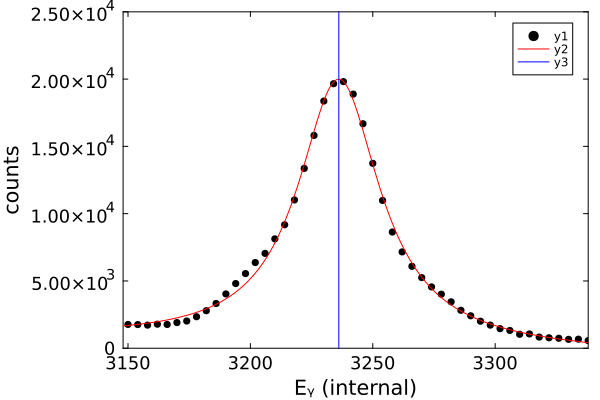

In [163]:
c2c3_p2_mean = 3238
c2c3_x1low,c2c3_x1high=c2c3_p2_mean-90,c2c3_p2_mean+100; ylow,yhigh=0,25000
c2c3_param1=[100,0.05,2e5,c2c3_p2_mean,5.0]

c2c3_p2,c2c3_s1,f=PhotopeakFit.lorentzfit(kc2c3,c2c3_x1low,c2c3_x1high,c2c3_param1)

for (i,val) in enumerate(c2c3_p2)
    println("P$i = ",val,"($(c2c3_s1[i]))")
end
println("Calibrated - Expected = $(c2c3_p2[4] - kliterature[2]) keV")

scatter(kc2c3[:,1],kc2c3[:,2],xlims=(c2c3_x1low,c2c3_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c2c3_p2),c2c3_x1low,c2c3_x1high,lc=:red)
vline!([c2c3_p2[4]],lc=:blue)

### Peak 3 (2013)

P1 = 2590.327666810095(2475.997917800881)
P2 = -0.2675256352552542(0.22134190291878691)
P3 = 634533.7124155868(6974.45701271221)
P4 = 11188.843747715579(0.12421476284569542)
P5 = 49.45989338471055(0.5207434124245214)
Calibrated - Expected = 9175.393747715578 keV


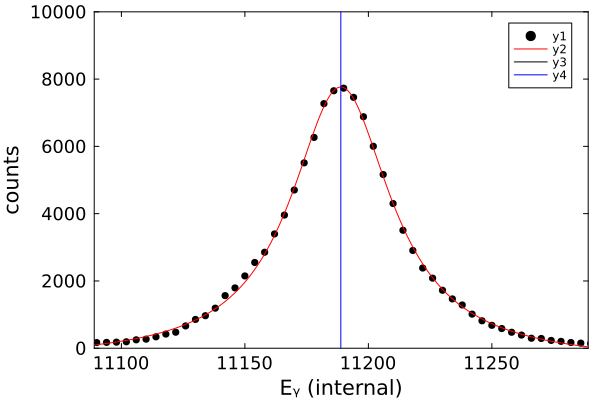

In [164]:
c2c3_p3_mean = 11189
c2c3_x1low,c2c3_x1high=c2c3_p3_mean-100,c2c3_p3_mean+100; ylow,yhigh=0,10000
c2c3_param1=[100,0.05,2e5,c2c3_p3_mean,5.0]

c2c3_p3,c2c3_s1,f=PhotopeakFit.lorentzfit(kc2c3,c2c3_x1low,c2c3_x1high,c2c3_param1)

for (i,val) in enumerate(c2c3_p3)
    println("P$i = ",val,"($(c2c3_s1[i]))")
end
println("Calibrated - Expected = $(c2c3_p3[4] - kliterature[3]) keV")

scatter(kc2c3[:,1],kc2c3[:,2],xlims=(c2c3_x1low,c2c3_x1high),seriestype=:stepmid,ylims=(ylow,yhigh))
plot!(e->f(e,c2c3_p3),c2c3_x1low,c2c3_x1high,lc=:red)
vline!(kliterature,lc=:black)
vline!([c2c3_p3[4]],lc=:blue)

## Clover 2 Areas

In [ ]:
c2_areas = [(c2c1_p1[3] + c2c2_p1[3] + c2c3_p1[3]), 
            (c2c1_p2[3] + c2c2_p2[3] + c2c3_p2[3]), 
            (c2c1_p3[3] + c2c2_p3[3] + c2c3_p3[3])]

c2_area_σ=sqrt.(c2_areas)./c2_areas

display(c2_area_σ)

3-element Vector{Float64}:
 0.15438662786840562
 0.055540319893870045
 0.08410084512980154

# Intensity Calculations

In [166]:
areas = [c0_areas[1] + c1_areas[1] + c2_areas[1],
         c0_areas[2] + c1_areas[2] + c2_areas[2],
         c0_areas[3] + c1_areas[3] + c2_areas[3]]

3-element Vector{Float64}:
 1.0267554808956386e6
 6.765250553905252e6
 2.9806407083019055e6

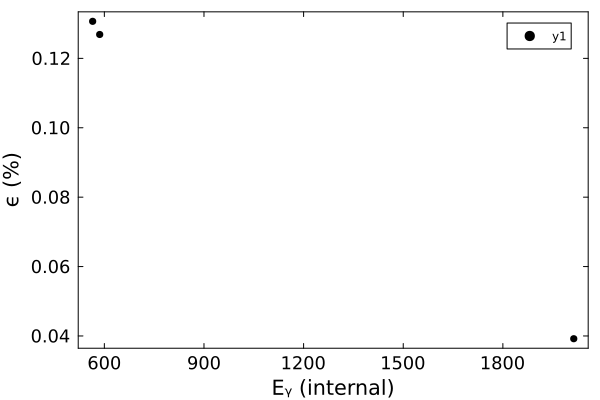

In [187]:
@. powerfit(e,p)=10^(p[1]+p[2]*log10(e)+p[3]*log10(e)^2)

scatter(kliterature,powerfit(kliterature,c1_eff_params)*100,ylabel="ϵ (%)")

In [ ]:
c0_intensity = c0_areas ./ (powerfit(kliterature,c0_eff_params))
c1_intensity = c1_areas ./ (powerfit(kliterature,c1_eff_params).*3/4)
c2_intensity = c2_areas ./ (powerfit(kliterature,c2_eff_params).*3/4)

asymm01 = (c0_intensity .- c1_intensity) ./ (c0_intensity .+ c1_intensity)
asymm21 = (c2_intensity .- c1_intensity) ./ (c2_intensity .+ c1_intensity)

println(asymm01,asymm21)

[0.02069163969724311, 0.027272977811427523, -0.012616197729026777][-0.07347260869639967, 0.07424961030473247, -0.05651606810194678]


# Asymmetry Plots

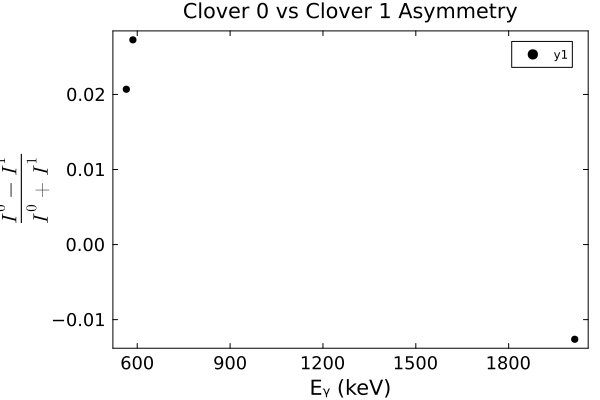

In [199]:
scatter(kliterature, asymm01, xlabel="Eᵧ (keV)",ylabel=L"\frac{I^0 - I^1}{I^0 + I^1}")
#hline!([0])
title!("Clover 0 vs Clover 1 Asymmetry")

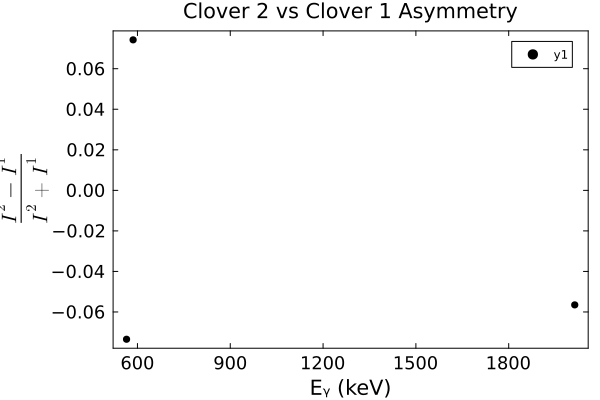

In [175]:
scatter(kliterature, asymm21, xlabel="Eᵧ (keV)",ylabel=L"\frac{I^2 - I^1}{I^2 + I^1}")
#hline!([0])
title!("Clover 2 vs Clover 1 Asymmetry")

In [176]:
println(c0_intensity ./ c1_intensity)
println(c2_intensity ./ c1_intensity)

[1.042257659662675, 1.0560752959243696, 0.9750819752689699]
[0.8631122804602847, 1.1604095685645317, 0.8930142762457384]
